In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, f1_score
sns.set()
print(tf.__version__)

2.0.0


In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# check shape of dataset
print("X Train shape {} and y Train shape {}".format(X_train.shape,y_train.shape))
print("X Test shape {} and y Test shape {}".format(X_test.shape,y_test.shape))

X Train shape (60000, 28, 28) and y Train shape (60000,)
X Test shape (10000, 28, 28) and y Test shape (10000,)


In [3]:
# scaling feature vector space
X_train = X_train/255
X_test = X_test/255

In [4]:
# Adding dummpy dimension to input as conv2d expected 3D data
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

# check shape of dataset
print("X Train shape {} and y Train shape {}".format(X_train.shape,y_train.shape))
print("X Test shape {} and y Test shape {}".format(X_test.shape,y_test.shape))

X Train shape (60000, 28, 28, 1) and y Train shape (60000,)
X Test shape (10000, 28, 28, 1) and y Test shape (10000,)


In [5]:
# check the number of target classes
n_out = len(set(y_train))
n_out

10

In [6]:
# input shape to the model
input_shape = X_train[0].shape
input_shape

(28, 28, 1)

In [7]:
# building convolution network for image classification using keras functional API
i = Input(shape=input_shape)
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
x = Conv2D(64,(3,3), strides =2, activation='relu')(x)
x = Conv2D(128,(3,3),strides =2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(n_out,activation='softmax')(x)

model = Model(i,x)

In [8]:
# compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
# train the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 34s 562us/sample - loss: 0.5178 - accuracy: 0.8088 - val_loss: 0.4021 - val_accuracy: 0.8473
Epoch 2/15
60000/60000 [==============================] - 30s 506us/sample - loss: 0.3596 - accuracy: 0.8643 - val_loss: 0.3437 - val_accuracy: 0.8695
Epoch 3/15
60000/60000 [==============================] - 30s 499us/sample - loss: 0.3137 - accuracy: 0.8815 - val_loss: 0.3166 - val_accuracy: 0.8824
Epoch 4/15
60000/60000 [==============================] - 30s 500us/sample - loss: 0.2799 - accuracy: 0.8931 - val_loss: 0.3001 - val_accuracy: 0.8879
Epoch 5/15
60000/60000 [==============================] - 29s 489us/sample - loss: 0.2555 - accuracy: 0.9032 - val_loss: 0.3015 - val_accuracy: 0.8888
Epoch 6/15
60000/60000 [==============================] - 29s 481us/sample - loss: 0.2343 - accuracy: 0.9122 - val_loss: 0.2945 - val_accuracy: 0.8969
Epoch 7/15
60000/60000 [====================

In [12]:
# Check accuracy on test dataset
predict = model.predict(X_test).argmax(axis=1)
print('Test Accuracy {}'.format(accuracy_score(y_test,predict)))
print('Test F1 Score {}'.format(f1_score(y_test,predict,average='weighted'))) 

Test Accuracy 0.899
Test F1 Score 0.8984788176921052


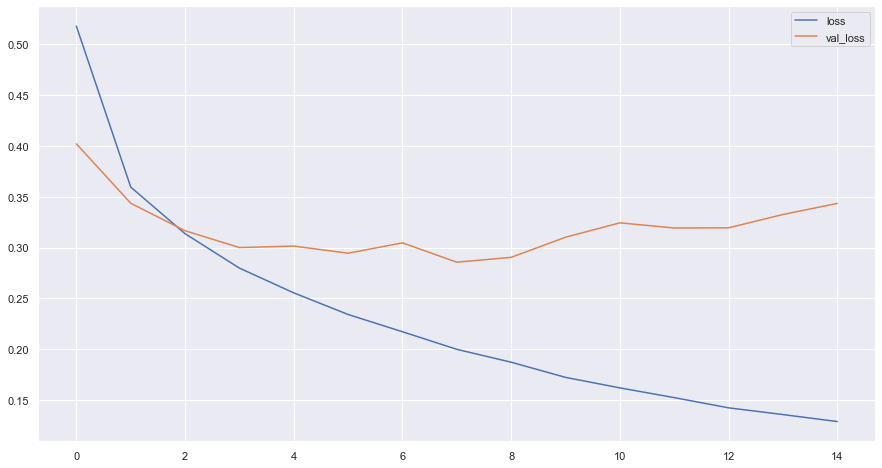

In [13]:
# plot loss 
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

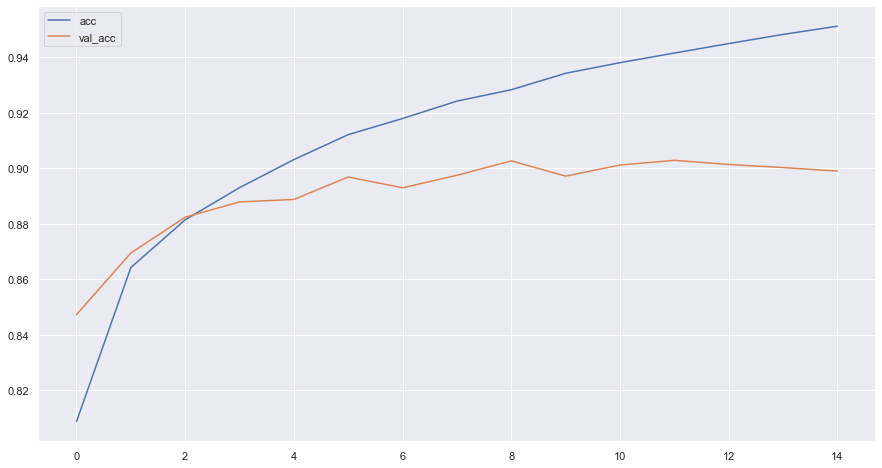

In [14]:
# Plot  accuracy 
plt.figure(figsize=(15,8))
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [17]:
label_mapping = {0 :'T-shirt/top',
                 1 :'Trouser',
                 2 :'Pullover',
                 3 :'Dress',
                 4 :'Coat',
                 5 :'Sandal',
                 6 :'Shirt',
                 7 :'Sneaker',
                 8 :'Bag',
                 9 :'Ankle boot'}

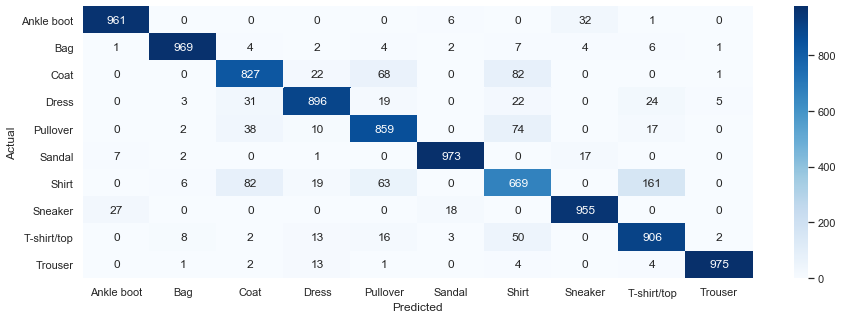

In [23]:
# confusion matrix
confusion = pd.DataFrame({'Actual':y_test,'Predicted':predict})

# map label to categories
confusion['Actual'] = confusion['Actual'].map(label_mapping)
confusion['Predicted'] = confusion['Predicted'].map(label_mapping)

# plot confusion matrix heat map
confusion_mat = confusion.groupby(['Actual','Predicted']).size().unstack(fill_value=0)
plt.figure(figsize=(15,5))
sns.heatmap(confusion_mat,annot=True,fmt='g',cmap='Blues')

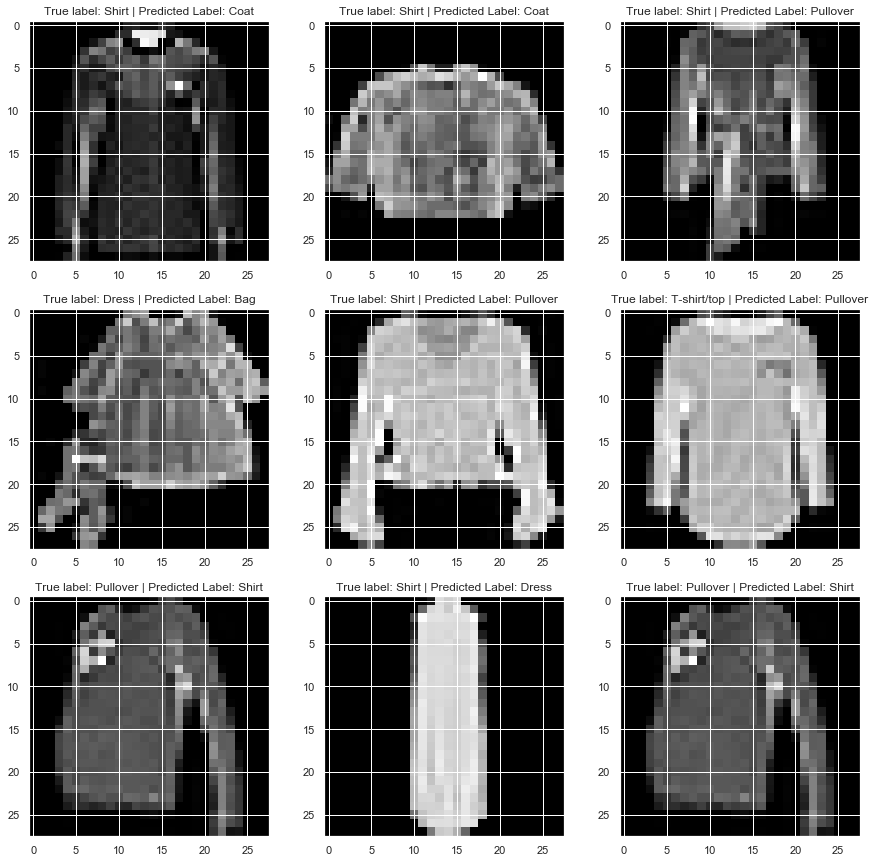

In [29]:
# index of Sample images where predictions are wrong
all_idx =  np.where(confusion['Actual'] != confusion['Predicted'])[0]
sample_idx = np.random.choice(all_idx,9)

# plot sample images
fig, axs = plt.subplots(3, 3,figsize=(15, 15))

# start idx
pos = 0
for row in range(3):
    for col in range(3):
        img_idx = sample_idx[pos]
        axs[row, col].imshow(X_test[img_idx].reshape(28,28), cmap='gray')
        axs[row,col].set_title("True label: {} | Predicted Label: {}".format(confusion['Actual'][img_idx],
                                                                             confusion['Predicted'][img_idx])) 
        pos = pos + 1